In [1]:
# Clustering and Dimentionnality Reduction

<div class="alert alert-block alert-danger">

1. Import the CIFAR-10 dataset using the following code and create a new dataset containing only the following classes: "airplane," "automobile," "bird," and "cat."

<div/>

<div class="alert alert-block alert-warning">The CIFAR-10 dataset is composed of 60000 RGB images( 32x32 pixels), categorized into 10 classes with 6000 images per class. It is divided into 50000 training images and 10000 test images.
<div/>

In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
# load dataset
(trainX, trainy), _ = cifar10.load_data()
#trainX: This contains the image data as an array of shape (50000, 32, 32, 3)
#trainy: This contains the corresponding class labels as an array of shape (50000, 1). Each entry is a number between 0 and 9, indicating the class of the image.
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)


- 50000 => number of training images in the dataset.
- 32 , 32 => Height and Width of each img
- 3 => Number of channels (Red, Green, Blue) for each image.

### create a new dataset containing only the following classes: "airplane," "automobile," "bird," and "cat."

In [2]:
selected_classes = [0, 1, 2, 3]  
mask = np.isin(trainy, selected_classes).flatten()  #if trainy corresponds to one of selected_classes then return true else false so it will return like in each trainy that are labels true or false
filtered_trainX = trainX[mask] # each label is true returns its image
filtered_trainy = trainy[mask] #each label is true returns its label 

# Relabel the classes for simplicity (0 -> airplane, 1 -> automobile, etc.)
for new_label, old_label in enumerate(selected_classes):
    filtered_trainy[filtered_trainy == old_label] = new_label

print(f"Filtered Train: X={filtered_trainX.shape}, y={filtered_trainy.shape}")

Filtered Train: X=(20000, 32, 32, 3), y=(20000, 1)


<div class="alert alert-block alert-danger">


2. Visualize some samples from the dataset with their corresponding labels.

3. Normalize the training data by dividing all values by 255.

4. Visualize the data using a 2D plot by applying dimensionality reduction based on PCA with two components.

5. Apply the K-means algorithm, K-means with PCA (with a variance of 95%), and K-means with LDA (3 components) on the normalized training data.

6. Visualize the data after clustering using a 2D plot (use PCA with 2 components for dimensionality reduction) for each model. What do you observe?

7. Compute the Davies-Bouldin score for all generated models.

8. Display the confusion matrix and the classification reports for all models. What do you observe?

9. Display some misclassifications for the best model (image with the true label and predicted label).

10. Try to enhance the performance of the best model.
<div/>

### 2. Visualize some samples from the dataset with their corresponding labels.

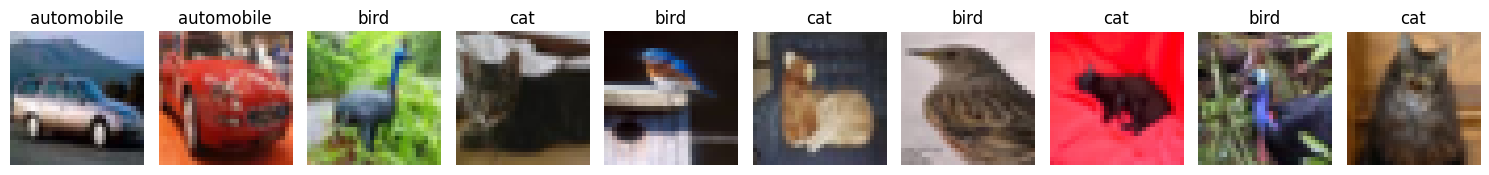

In [3]:
import matplotlib.pyplot as plt

# Visualize 10 samples
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for index_plt, subplot in enumerate(axes):
    subplot.imshow(filtered_trainX[index_plt]) #display the image in the subplot
    subplot.set_title(label_names[selected_classes[filtered_trainy[index_plt][0]]])
    subplot.axis('off')
plt.tight_layout()

plt.show()


### 3. Normalize the training data by dividing all values by 255.

In [27]:
#Each pixel value is typically in the range [0, 255] dividing these values by 255 scales them to the range [0, 1].
normalized_trainX = filtered_trainX.astype('float32') / 255.0
print(f"Normalized data shape: {normalized_trainX.shape}")

Normalized data shape: (20000, 32, 32, 3)


### 4. Visualize the data using a 2D plot by applying dimensionality reduction based on PCA with two components.

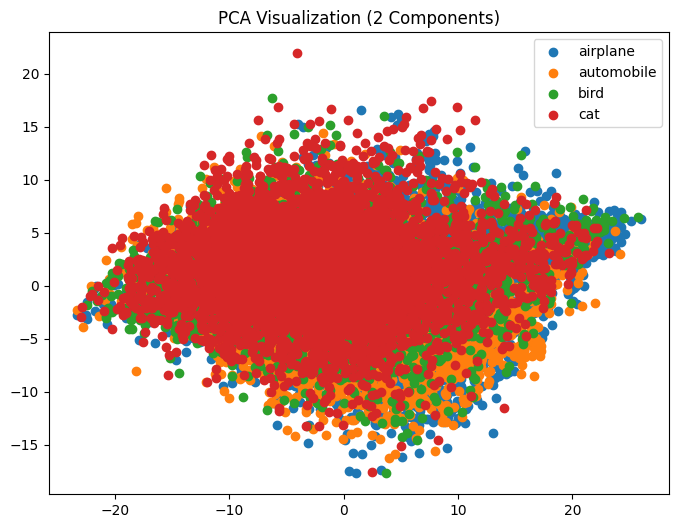

In [6]:
from sklearn.decomposition import PCA

data_reshaped = normalized_trainX.reshape(normalized_trainX.shape[0], -1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_reshaped)

plt.figure(figsize=(8, 6))
for label in np.unique(filtered_trainy):
    plt.scatter(pca_data[filtered_trainy.flatten() == label, 0],
                pca_data[filtered_trainy.flatten() == label, 1], label=label_names[selected_classes[label]])
plt.legend()
plt.title("PCA Visualization (2 Components)")
plt.show()


### 5. Apply the K-means algorithm, K-means with PCA (with a variance of 95%), and K-means with LDA (3 components) on the normalized training data.

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [10]:
# Standard K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data_reshaped)

In [11]:
# K-means with PCA (95% variance)
pca_95 = PCA(n_components=0.95)
trainX_pca_95 = pca_95.fit_transform(data_reshaped)
kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(trainX_pca_95)

In [12]:
# K-means with LDA
lda = LDA(n_components=3)
trainX_lda = lda.fit_transform(data_reshaped, filtered_trainy.squeeze())
kmeans_lda = KMeans(n_clusters=4, random_state=42)
kmeans_lda_labels = kmeans_lda.fit_predict(trainX_lda)

### 6. Visualize the data after clustering using a 2D plot (use PCA with 2 components for dimensionality reduction) for each model. What do you observe?

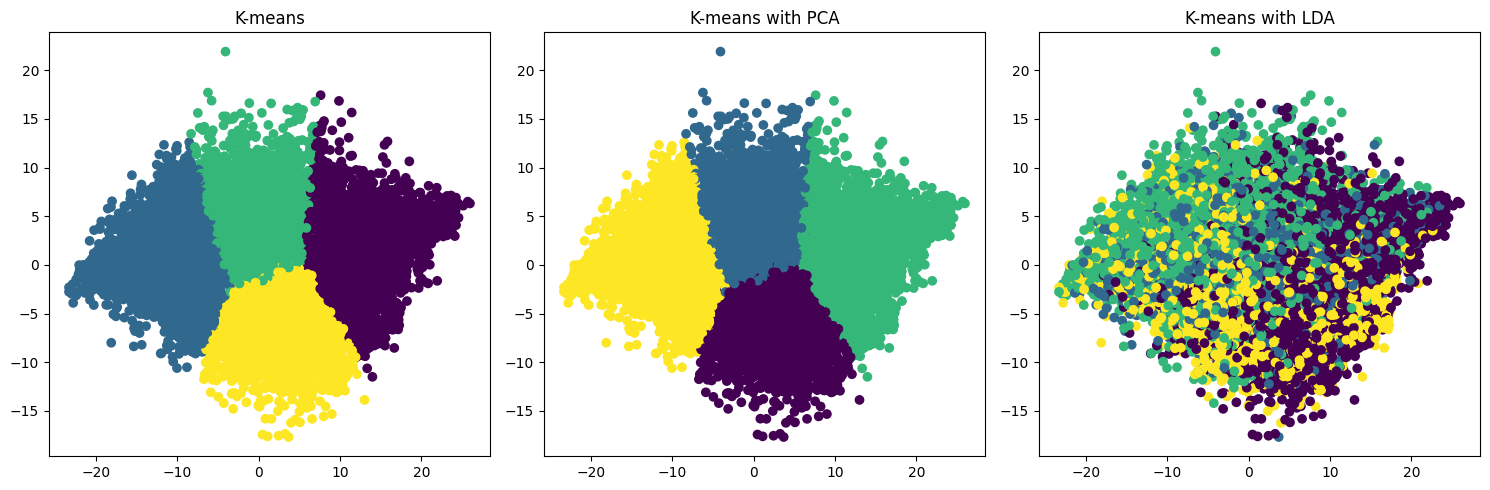

In [13]:
clustering_methods = [
    ('K-means', kmeans_labels),
    ('K-means with PCA', kmeans_pca_labels),
    ('K-means with LDA', kmeans_lda_labels)
]

plt.figure(figsize=(15, 5))
for i, (title, labels) in enumerate(clustering_methods, 1):
    plt.subplot(1, 3, i)
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
plt.tight_layout()
plt.show()

### 7. Compute the Davies-Bouldin score for all generated models.

In [14]:
from sklearn.metrics import davies_bouldin_score

# Compute DB scores
scores = {
    "K-means": davies_bouldin_score(data_reshaped, kmeans_labels),
    "K-means with PCA": davies_bouldin_score(trainX_pca_95, kmeans_pca_labels),
    "K-means with LDA": davies_bouldin_score(trainX_lda, kmeans_lda_labels)
}

for model, score in scores.items():
    print(f"{model}: Davies-Bouldin Score = {score:.2f}")


K-means: Davies-Bouldin Score = 2.45
K-means with PCA: Davies-Bouldin Score = 2.36
K-means with LDA: Davies-Bouldin Score = 1.06


### 8. Display the confusion matrix and the classification reports for all models. What do you observe?

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
models = [kmeans_labels, kmeans_pca_labels, kmeans_lda_labels]
titles = ["K-means", "K-means with PCA (95%)", "K-means with LDA"]
# Classification report for each model
for i, labels in enumerate(models):
    print(f"Classification Report for {titles[i]}:")
    print(classification_report(filtered_trainy.flatten(), labels))
    print()


Classification Report for K-means:
              precision    recall  f1-score   support

           0       0.47      0.36      0.41      5000
           1       0.30      0.34      0.32      5000
           2       0.32      0.38      0.35      5000
           3       0.16      0.14      0.15      5000

    accuracy                           0.31     20000
   macro avg       0.31      0.31      0.31     20000
weighted avg       0.31      0.31      0.31     20000


Classification Report for K-means with PCA (95%):
              precision    recall  f1-score   support

           0       0.32      0.29      0.30      5000
           1       0.18      0.22      0.20      5000
           2       0.22      0.17      0.19      5000
           3       0.31      0.35      0.33      5000

    accuracy                           0.25     20000
   macro avg       0.26      0.25      0.25     20000
weighted avg       0.26      0.25      0.25     20000


Classification Report for K-means with LDA:

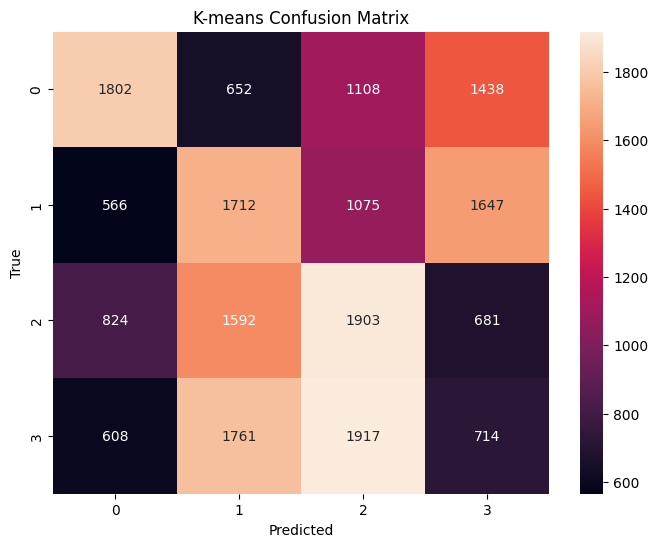

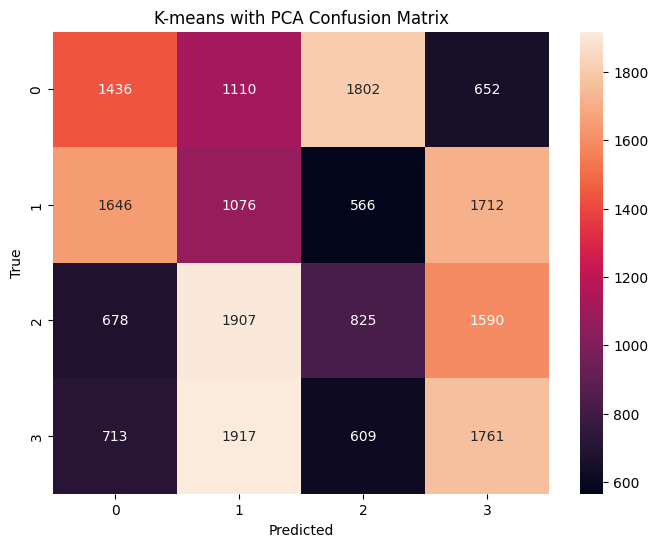

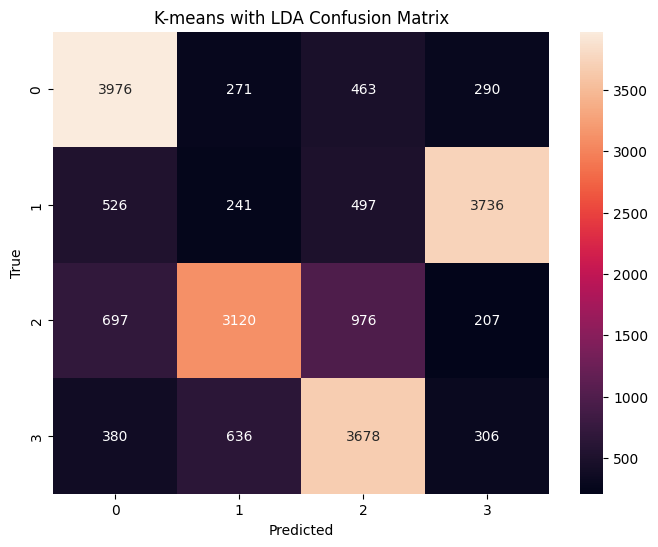

In [30]:
import seaborn as sns
def plot_confusion_matrix(true_labels, pred_labels, title):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(true_labels, pred_labels)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

clustering_labels = [kmeans_labels, kmeans_pca_labels, kmeans_lda_labels]
for i, labels in enumerate(clustering_labels):
    method_name = ['K-means', 'K-means with PCA', 'K-means with LDA'][i]
    plot_confusion_matrix(filtered_trainy.squeeze(), labels, f'{method_name} Confusion Matrix')



### 9. Display some misclassifications for the best model (image with the true label and predicted label).

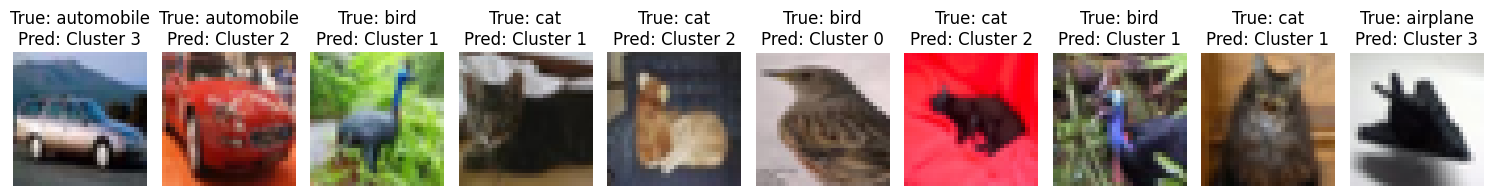

In [17]:
# Identify misclassifications (example: K-means with LDA)
misclassified_indices = np.where(filtered_trainy.flatten() != kmeans_lda_labels)[0]

# Display first 10 misclassifications
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    idx = misclassified_indices[i]
    ax.imshow(filtered_trainX[idx])
    ax.set_title(f"True: {label_names[selected_classes[filtered_trainy[idx][0]]]}\nPred: Cluster {kmeans_lda_labels[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


### 10. Try to enhance the performance of the best model.

In [18]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_reshaped)
kmeans_pca = KMeans(n_clusters=4, random_state=42)
score = davies_bouldin_score(pca_data, kmeans_labels)
print(score)

0.9094145783977639
